In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
iris_df = pd.read_csv('iris.csv')

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 6)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

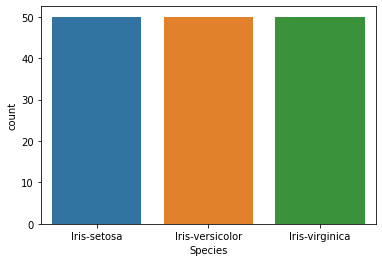

In [7]:
sns.countplot(x='Species', data = iris_df)  ## well balanced data set

In [10]:
df = iris_df.drop(['Id'], axis = 1)

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


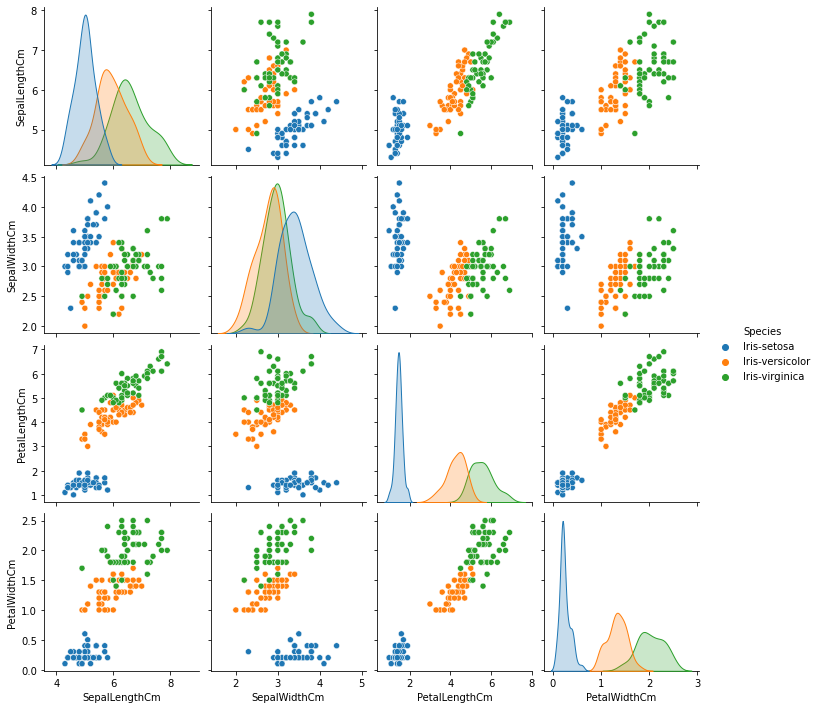

In [12]:
plot = sns.pairplot(df, hue = 'Species')

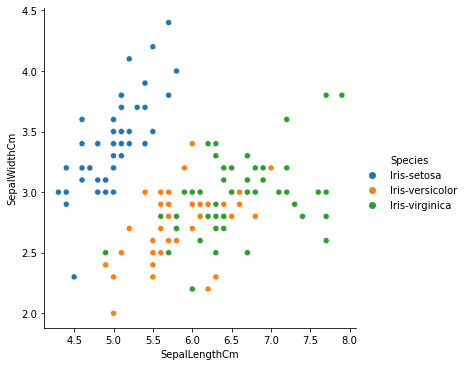

In [17]:
sns.relplot(x = 'SepalLengthCm', y = 'SepalWidthCm' , data = df, hue = 'Species')

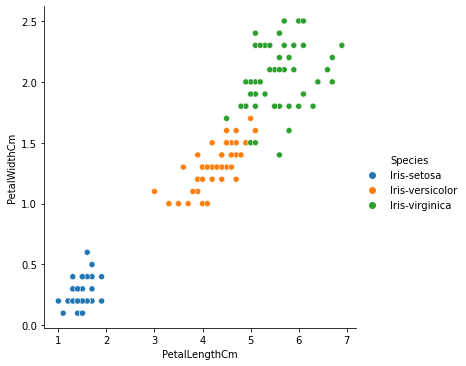

In [18]:
sns.relplot(x = 'PetalLengthCm', y = 'PetalWidthCm' , data = df, hue = 'Species')

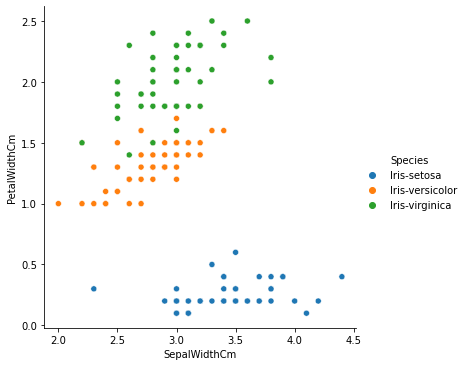

In [21]:
sns.relplot(x = 'SepalWidthCm', y = 'PetalWidthCm' , data = df, hue = 'Species')

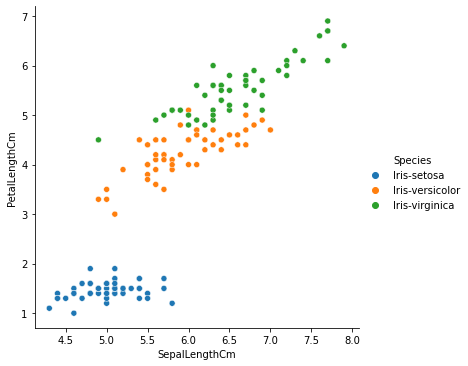

In [22]:
sns.relplot(x = 'SepalLengthCm', y = 'PetalLengthCm' , data = df, hue = 'Species')

In [24]:
#### Train-test split for modeling the data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
X = df.drop(['Species'], axis = 1)
Y = df['Species']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state= 101)

In [31]:
##### K nearest

Text(0, 0.5, 'Accuracy Score')

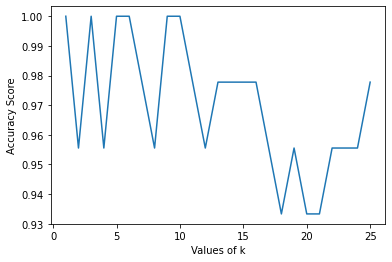

In [33]:
k_range = list(range(1,26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range, scores)
plt.xlabel('Values of k')
plt.ylabel('Accuracy Score')

In [34]:
#### Maximum value of accuracy obtained at k = 12

In [37]:
modelKnn = KNeighborsClassifier(n_neighbors = 12)
modelKnn.fit(X_train,y_train)
y_pred = modelKnn.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test,y_pred)

In [41]:
print(cm)

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [ ]:
## Logistic Regression

In [78]:
model = LogisticRegression()

In [79]:
model.fit(X_train,y_train)

LogisticRegression()

In [80]:
y_pred_logit = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


In [81]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [82]:
 ## K means

C:\Users\SAHANA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

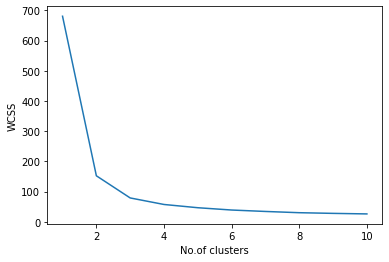

In [83]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')

In [94]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [99]:
X = df.iloc[:, [1, 2, 3, 4]].values

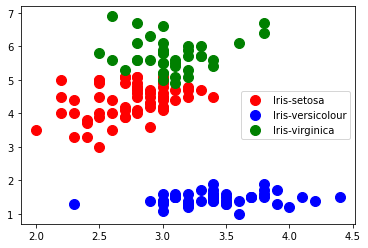

In [101]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()